# boxplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Диаграмма размаха, "ящик с усами" или боксплот. В *seaborn* за построение таких диаграмм отвечает функция `sns.boxplot()`.

Рассматривать примеры будем на данных из датасета `'mpg'`, который содержит информацию о расходе топлива различных моделей автомобилей 1970-1980-х годов выпуска. Посмотрим на этот датефрейм:

In [3]:
df = sns.load_dataset('mpg').dropna()

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Столбцы датафрейма содержат следующую информацию:
- `'mpg'`: расход топлива, измеренный в милях на галлон (miles per gallon);
- `'cylinders'`: количество цилиндров в двигателе;
- `'displacement'`: объем двигателя, измеренный в кубических дюймах;
- `'horsepower'`: мощность двигателя, измеренная в лошадиных силах;
- `'weight'`: вес автомобиля в фунтах;
- `'acceleration'`: время разгона с 0 до 60 миль в час, измеренное в секундах;
- `'model_year'`: год выпуска модели автомобиля;
- `'origin'`: страна происхождения автомобиля (США, Европа, Япония);
- `'name'`: название модели автомобиля

In [5]:
df = df[df['cylinders'].isin([4, 6, 8])]

Для начала построим диаграмму размаха по расходу топлива:

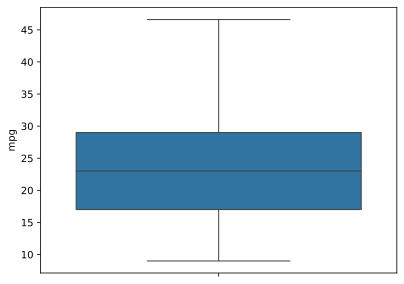

In [7]:
sns.boxplot(df['mpg']);

По умолчанию диаграмма получилась весьма широкой, что можно исправить параметром `width`

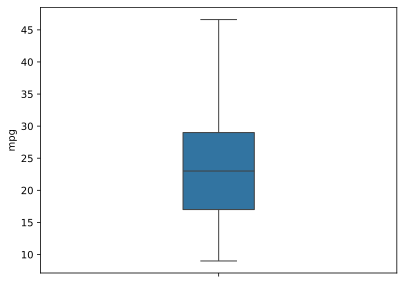

In [8]:
sns.boxplot(data=df, y='mpg', 
            width=0.2);

Горизонтальное отображение диаграммы:

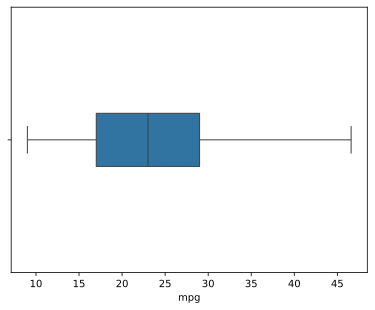

In [9]:
sns.boxplot(data=df, x='mpg', 
            width=0.2);

Итак, задействуем обе оси, по одной из которых отложим категориальную переменную ('origin'), а по другой - количественную ('mpg'):

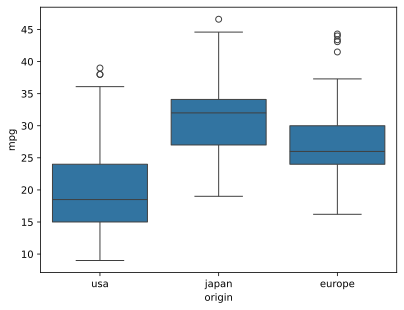

In [10]:
sns.boxplot(data=df, x='origin', y='mpg');

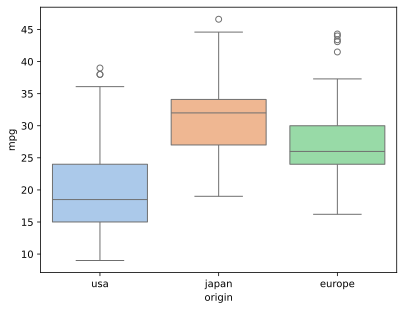

In [11]:
sns.boxplot(data=df, x='origin', y='mpg', 
            hue='origin', 
            palette='pastel');

При помощи параметра `hue` также посмотрим, как распределяются автомобили в зависимости от количества цилиндров в двигателе:

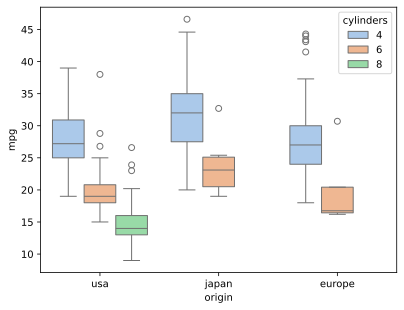

In [12]:
sns.boxplot(data=df, x='origin', y='mpg', 
            palette='pastel',
            hue='cylinders');

Если нужно поменять последовательность отображения коробочек на графике, то для этого параметр `hue_order`.

Например, изменим очередность отображения  с [4, 6, 8] на [8, 6, 4]:

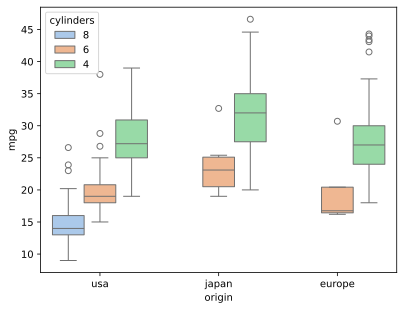

In [13]:
sns.boxplot(data=df, x='origin', y='mpg', 
            palette='pastel',
            hue='cylinders',
            hue_order=[8, 6, 4]);

Также параметром `hue_order` мы можем управлять количеством отображаемых категорий. Например, на диаграмме оставим только данные по автомобилям с 4-х и 6-тицилиндровыми двигателями:

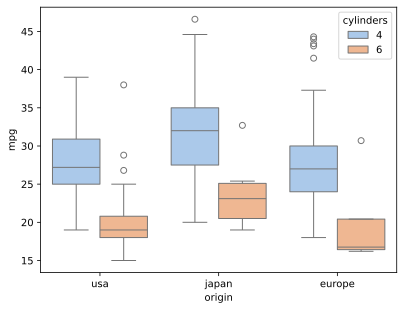

In [14]:
sns.boxplot(data=df, x='origin', y='mpg', 
            palette='pastel',
            hue='cylinders',
            hue_order=[4, 6]);

**Параметр order**

Параметр `order` в функции `sns.boxplot` используется для упорядочивания категорий на оси X или Y (в зависимости от того, по какой оси отложены категории).

По умолчанию категории отображаются на графике в порядке их появления в датафрейме, однако мы можем изменить это, например, упорядочив их в алфавитном порядке:

In [15]:
sorted(df['origin'].unique())

['europe', 'japan', 'usa']

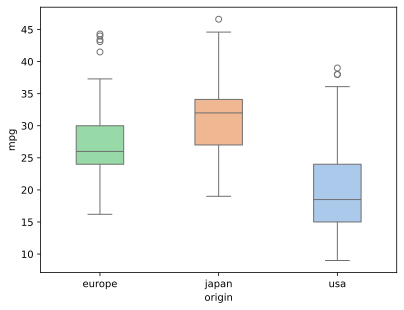

In [16]:
sns.boxplot(data=df, x='origin', y='mpg', 
            hue='origin', 
            palette='pastel', 
            width=0.4,
            order=sorted(df['origin'].unique()));

Как и другие функции, `sns.boxplot()` имеет в своём составе парамеры `color` и `saturation`, которые позволяют выбирать цвет диаграммы и его насыщенность, соответственно. Например:

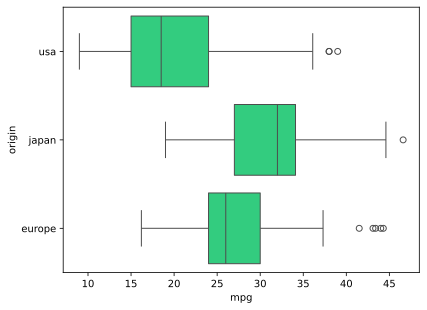

In [17]:
sns.boxplot(x='mpg', y='origin', data=df,
            color='SpringGreen',
            saturation=0.6);

Для изменения толщины линий используют параметр `linewidth`. Сделаем для примера линии потолще:

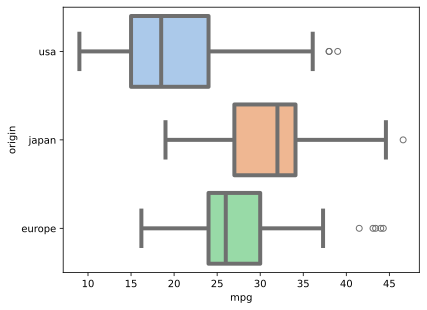

In [18]:
sns.boxplot(x='mpg', y='origin', data=df,
            hue='origin',
            palette='pastel',
            linewidth=4);

**Параметр whis**

Параметр `whis` функции `sns.boxplot()` определяет положение "усов" (whiskers) на диаграмме. Эти "усы" представляют собой диапазон данных, который используется для идентификации выбросов. Значение параметра whis влияет на длину "усов" и, соответственно, на то, какие точки будут считаться выбросами.

По умолчанию `whis=1.5`. Это означает, что "усы" будут простираться до 1.5 межквартильных размаха (**IQR**) от первого и третьего квартилей.

Если указать одно число, например, `whis=2`, то "усы" будут простираться до 2 межквартильных размахов от квартилей:

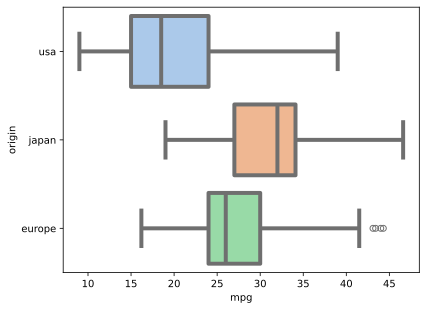

In [19]:
sns.boxplot(x='mpg', y='origin', data=df,
            hue='origin',
            palette='pastel',
            linewidth=4,
            whis=2);

Если указать два числа, например, `whis=[5, 95]`, то "усы" будут простираться до 5-го и 95-го процентилей данных:

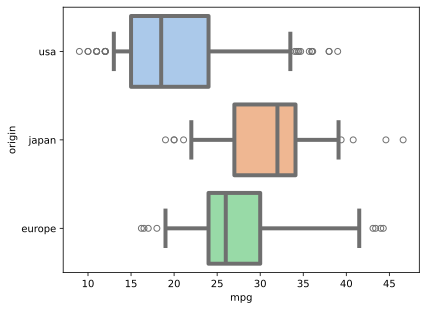

In [20]:
sns.boxplot(x='mpg', y='origin', data=df,
            hue='origin',
            palette='pastel',
            linewidth=4,
            whis=[5, 95]);

А если указать `whis=[0, 100]`, то "усы" будут простираться до минимального и максимального значения данных, и выбросы не будут отображаться:

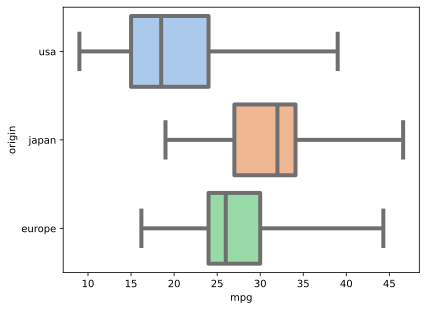

In [21]:
sns.boxplot(x='mpg', y='origin', data=df,
            hue='origin',
            palette='pastel',
            linewidth=4,
            whis=[0, 100]);

**Параметр fliersize**

Параметр `fliersize` управляет размером маркеров, которые используются для обозначения выбросов на графике. Этот параметр принимает числовое значение, определяющее диаметр маркеров. По умолчанию` fliersize` имеет значение 5. Увеличивая или уменьшая это значение, вы можете контролировать, насколько крупными или мелкими будут маркеры выбросов на вашем графике.

**Параметр showcaps**

Параметр `showcaps` позволяет убирать "засечки" на концах "усов", которые представляют собой минимальные и максимальные значения данных (исключая выбросы). По умолчанию `showcaps=True`.

Для примера уберём эти "засечки":

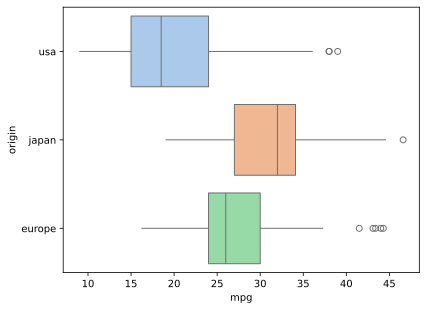

In [22]:
sns.boxplot(x='mpg', y='origin', data=df,
            hue='origin',
            palette='pastel',
            showcaps=False);